<a href="https://colab.research.google.com/github/ikwanpras/Analisis-Survival/blob/main/K-Nearest%20Neighbors%20(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#memanggil data
data = pd.read_excel('/content/data_label.xlsx')
data.head()

,Unnamed: 0,bulan,full_text,compound,Sentimen
0,0,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,-0.0516,Negatif
1,1,November,kdg bingung mau ikut materi yg dikasi guru ata...,-0.5574,Negatif
2,2,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,-0.0387,Negatif
3,3,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,-0.1280,Negatif
4,4,November,aku gatau lagi sama menteri pendidikan yang ng...,-0.6794,Negatif


## **Cleansing Data**

In [ ]:
import re

def remove_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet
data['full_text']=data['full_text'].apply(str)
data['full_text'] = np.vectorize(remove_pattern)(data['full_text'], "@[\w]*")
data['full_text'] = np.vectorize(remove_pattern)(data['full_text'], "#[\w]*")

In [ ]:
def cleansing(text):

    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    return text

sample = data['full_text'].iloc[4166] #sample data baris kelima atau data kelima
cleansing_data = cleansing(sample)
print('data\t: ', sample)
print('Cleansing \t: ', cleansing_data)


data	:  Buku kurikulum merdeka kenapa bagus banget ya ilustrasinya. Ini buku kelas 1 berwarna banget. Gue aja yang udah gede gini betah liatnya. https://t.co/8lvA5FXO2w
Cleansing 	:  Buku kurikulum merdeka kenapa bagus banget ya ilustrasinya Ini buku kelas  berwarna banget Gue aja yang udah gede gini betah liatnya 


## **Case Folding**

In [ ]:
import pickle


#Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower() #untuk merubah huruf jadi huruf kecil
  text = re.sub(r'https?://\S+|www\.\S+', '', text) #untuk menghapus link
  text = re.sub(r'[-+]?[0-9]+', '', text) #untuk tanda - + dan numerik
  text = re.sub(r'[^\w\s]','', text) #menghapus tanda baca
  text = text.strip()
  return text

sample = data['full_text'].iloc[4166] #sample data baris kelima atau data kelima
case_folding = casefolding(sample)

print('data\t: ', sample)
print('Case folding\t: ', case_folding)

data	:  Buku kurikulum merdeka kenapa bagus banget ya ilustrasinya. Ini buku kelas 1 berwarna banget. Gue aja yang udah gede gini betah liatnya. https://t.co/8lvA5FXO2w
Case folding	:  buku kurikulum merdeka kenapa bagus banget ya ilustrasinya ini buku kelas  berwarna banget gue aja yang udah gede gini betah liatnya


## **Word** **Normalization**

In [ ]:
#Download corpus singkatan
#untuk mendownload melalui link pake !wget
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-12-27 02:06:34--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.05s   

2023-12-27 02:06:34 (1.64 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [ ]:
normal_key = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text = ' '.join([normal_key[normal_key['singkat'] == word]['hasil'].values[0] if (normal_key['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
sample = data['full_text'].iloc[2]
case_folding = casefolding(sample)
word_normalization = text_normalize(case_folding)

print('Raw data\t\t: ', sample)
print('Case folding\t\t: ', case_folding)
print('Word normalization\t\t: ', word_normalization)

Raw data		:  gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜« duh kurikulum merdeka anjing
Case folding		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Word normalization		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing


## **Filtering (Stopword Removal)**

In [ ]:
#install library natural language toolkit
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwords_ind = stopwords.words('indonesian') #kamus kata untuk menyaring kata yang tidak diperlukan dalam pemprosesan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(stopwords_ind) #melihat jmlh daftar kata yang diabaikan

758

In [ ]:
stopwords_ind #melihat stopwords yang disediakan nltk

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
#membuat fungsi untuk langkah stopword removal
def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
sample = data['full_text'].iloc[2]
case_folding = casefolding(sample)
word_normalization = text_normalize(case_folding)
stopword_removal = remove_stop_words(word_normalization)

print('Raw data\t\t: ', sample)
print('Case folding\t\t: ', case_folding)
print('Word normalization\t\t: ', word_normalization)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜« duh kurikulum merdeka anjing
Case folding		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Word normalization		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Stopword removal	:  gaharus bersalaaaahhbb gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing


## **Stemming**

In [ ]:
!pip -q install sastrawi #menginstall beda dengan import (memanggil)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
sample = data['full_text'].iloc[2]
case_folding = casefolding(sample)
word_normalization = text_normalize(case_folding)
stopword_removal = remove_stop_words(word_normalization)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', sample)
print('Case folding\t\t: ', case_folding)
print('Word normalization\t\t: ', word_normalization)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜«ðŸ˜« duh kurikulum merdeka anjing
Case folding		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Word normalization		:  gaharus merasa bersalaaaahhbb tapi gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Stopword removal	:  gaharus bersalaaaahhbb gwww ðÿðÿðÿðÿðÿ duh kurikulum merdeka anjing
Stemming		:  gaharus bersalaaaahhbb gwww duh kurikulum merdeka anjing


# **Tokenizing**

In [ ]:
import nltk
nltk.download('punkt')

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sample = data['full_text'].iloc[4166]
case_folding = casefolding(sample)
word_normalization = text_normalize(case_folding)
stopword_removal = remove_stop_words(word_normalization)
text_stemming = stemming(stopword_removal)
tokenizing = tokenizingText(text_stemming)

print('Raw data\t\t: ', sample)
print('Case folding\t\t: ', case_folding)
print('Word normalization\t\t: ', word_normalization)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)
print('Tokenizing\t\t: ', tokenizing)

Raw data		:  Buku kurikulum merdeka kenapa bagus banget ya ilustrasinya. Ini buku kelas 1 berwarna banget. Gue aja yang udah gede gini betah liatnya. https://t.co/8lvA5FXO2w
Case folding		:  buku kurikulum merdeka kenapa bagus banget ya ilustrasinya ini buku kelas  berwarna banget gue aja yang udah gede gini betah liatnya
Word normalization		:  buku kurikulum merdeka kenapa bagus banget ya ilustrasinya ini buku kelas berwarna banget saya saja yang sudah besar begini betah lihatnya
Stopword removal	:  buku kurikulum merdeka bagus banget ya ilustrasinya buku kelas berwarna banget betah lihatnya
Stemming		:  buku kurikulum merdeka bagus banget ya ilustrasi buku kelas warna banget betah lihat
Tokenizing		:  ['buku', 'kurikulum', 'merdeka', 'bagus', 'banget', 'ya', 'ilustrasi', 'buku', 'kelas', 'warna', 'banget', 'betah', 'lihat']


## **Text Preprocessing Pipeline**

In [ ]:
# Membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['full_text'].apply(text_preprocessing_process)

CPU times: user 13min 50s, sys: 2.93 s, total: 13min 53s
Wall time: 14min 10s


In [ ]:
data

,Unnamed: 0,bulan,full_text,compound,Sentimen,clean_teks
0,0,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,-0.0516,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...
1,1,November,kdg bingung mau ikut materi yg dikasi guru ata...,-0.5574,Negatif,terkadang bingung materi kasih guru materi kur...
2,2,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,-0.0387,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...
3,3,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,-0.1280,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...
4,4,November,aku gatau lagi sama menteri pendidikan yang ng...,-0.6794,Negatif,tau menteri didik ada kurikulum merdeka jujur ...
...,...,...,...,...,...,...
4339,4339,April,hmm.. jadi dulu yang setuju bilang ikan gak ...,0.3626,Positif,hmm tuju bilang ikan manjat pohon bikin kuriku...
4340,4340,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka
4341,4341,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka
4342,4342,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka


In [ ]:
data.to_csv('data_clean.csv',sep=';', index=False)

In [ ]:
data['text_preprocessed'] = data['clean_teks'].apply(tokenizingText)
data

,Unnamed: 0,bulan,full_text,compound,Sentimen,clean_teks,text_preprocessed
0,0,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,-0.0516,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...,"[ketua, pgri, irnes, jakli, kurikulum, merdeka..."
1,1,November,kdg bingung mau ikut materi yg dikasi guru ata...,-0.5574,Negatif,terkadang bingung materi kasih guru materi kur...,"[terkadang, bingung, materi, kasih, guru, mate..."
2,2,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,-0.0387,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...,"[gaharus, bersalaaaahhbb, gwww, duh, kurikulum..."
3,3,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,-0.1280,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...,"[kurikulum, merdeka, jalan, riweh, pas, pat, c..."
4,4,November,aku gatau lagi sama menteri pendidikan yang ng...,-0.6794,Negatif,tau menteri didik ada kurikulum merdeka jujur ...,"[tau, menteri, didik, ada, kurikulum, merdeka,..."
...,...,...,...,...,...,...,...
4339,4339,April,hmm.. jadi dulu yang setuju bilang ikan gak ...,0.3626,Positif,hmm tuju bilang ikan manjat pohon bikin kuriku...,"[hmm, tuju, bilang, ikan, manjat, pohon, bikin..."
4340,4340,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka,"[perintah, panjang, daftar, kurikulum, merdeka]"
4341,4341,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka,"[perintah, panjang, daftar, kurikulum, merdeka]"
4342,4342,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,0.1280,Positif,perintah panjang daftar kurikulum merdeka,"[perintah, panjang, daftar, kurikulum, merdeka]"


In [ ]:
data.to_csv('data_clean_tokn.csv')

## **Persiapan Data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_ready = pd.read_excel('/content/clean_data.xlsx')
data_ready

,bulan,full_text,Sentimen,clean_teks
0,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...
1,November,kdg bingung mau ikut materi yg dikasi guru ata...,Negatif,terkadang bingung materi kasih guru materi kur...
2,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...
3,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...
4,November,aku gatau lagi sama menteri pendidikan yang ng...,Negatif,tau menteri didik ada kurikulum merdeka jujur ...
...,...,...,...,...
4339,April,@Bali_Football @Sport77Official hmm.. jadi dul...,Positif,bal football sportofficial hmm tuju bilang ika...
4340,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka
4341,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka
4342,April,Pemerintah Perpanjang Pendaftaran Kurikulum Me...,Positif,perintah panjang daftar kurikulum merdeka


In [ ]:
#memisahkan x (feature) dan y (target)
X = data_ready['clean_teks'].astype(str)
y = data_ready['Sentimen']

In [ ]:
y.count()

4344

## **Feature Extraction**

In [ ]:
#Mengonversi kumpulan dokumen mentah menjadi matriks fitur TF-IDF
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

8700


In [ ]:
tf_idf.vocabulary_

{'ketua': 3832,
 'pgri': 5995,
 'irnes': 3229,
 'jakli': 3310,
 'kurikulum': 4141,
 'merdeka': 4830,
 'guru': 2672,
 'kendala': 3778,
 'jaring': 3340,
 'bupati': 1282,
 'solok': 7367,
 'tekad': 7769,
 'akan': 158,
 'juang': 3480,
 'terkadang': 7850,
 'bingung': 1033,
 'materi': 4702,
 'kasih': 3649,
 'soalny': 7339,
 'gabung': 2385,
 'aingg': 131,
 'gaharus': 2401,
 'bersalaaaahhbb': 937,
 'gwww': 2716,
 'duh': 1995,
 'anjing': 372,
 'jalan': 3312,
 'riweh': 6601,
 'pas': 5784,
 'pat': 5806,
 'cmn': 1485,
 'beban': 808,
 'nilai': 5395,
 'projek': 6255,
 'siswa': 7210,
 'ajaa': 137,
 'tau': 7734,
 'menteri': 4812,
 'didik': 1761,
 'ada': 49,
 'jujur': 3488,
 'pribadi': 6197,
 'capek': 1354,
 'banget': 687,
 'mata': 4689,
 'ajar': 143,
 'bener': 889,
 'paksain': 5716,
 'kelas': 3721,
 'sekolah': 6922,
 'rada': 6380,
 'gilla': 2552,
 'mapel': 4638,
 'ditest': 1896,
 'sisa': 7203,
 'ajh': 148,
 'wkkwkwkw': 8491,
 'stress': 7480,
 'jancok': 3325,
 'georgeno': 2522,
 'ar': 458,
 'gara': 2453

In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa' 'aaa' 'aaaa' ... 'zuzur' 'zyscollege' 'zzzzzz']


In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aaa,aaaa,aaaaaaaaaa,aah,aamiin,aayemen,ababil,abad,abadi,...,zoni,zonk,zonkkkk,zoom,zucowi,zuhdi,zulfikri,zuzur,zyscollege,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Feature Selection**

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
Y = np.array(y)

In [ ]:
#Pilih fitur sesuai dengan k skor tertinggi.
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

#Hitung statistik chi-squared antara setiap fitur dan kelas non-negatif.
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 5000 fitur dengan statistik chi-kuadrat tertinggi dipilih
chi2_features = SelectKBest(chi2, k = 5000)
X_kbest_features = chi2_features.fit_transform(X, Y)

print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 8700
Reduced feature number: 5000


In [ ]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.569239
1,1.514160
2,1.312689
3,1.832002
4,0.599918
...,...
8695,0.391583
8696,1.898890
8697,1.008521
8698,0.823059


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.569239,aa
1,1.514160,aaa
2,1.312689,aaaa
3,1.832002,aaaaaaaaaa
4,0.599918,aah
...,...,...
8695,0.391583,zuhdi
8696,1.898890,zulfikri
8697,1.008521,zuzur
8698,0.823059,zyscollege


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
687,39.693015,banget
1354,34.128279,capek
6338,29.001529,pusing
4022,26.879670,korban
4118,26.452457,kunci
...,...,...
3247,0.004000,istilah
7370,0.003694,solutif
8205,0.002056,ulang
3237,0.001566,isi


In [ ]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([False,  True,  True, ...,  True,  True,  True])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
    if bool:
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

['aaa',
 'aaaa',
 'aaaaaaaaaa',
 'aamiin',
 'aayemen',
 'ababil',
 'abad',
 'abal',
 'abang',
 'abanggsayur',
 'abc',
 'abcdefg',
 'abjeuw',
 'abrek',
 'abs',
 'absensi',
 'abstrak',
 'abt',
 'abu',
 'abuanaqie',
 'abyansaa',
 'acak',
 'acara',
 'aceh',
 'acil',
 'act',
 'activits',
 'acuangambaran',
 'adab',
 'adadikompas',
 'adain',
 'adakalo',
 'adakan',
 'adamantan',
 'adat',
 'adekku',
 'adekumala',
 'adil',
 'adinugrohowahib',
 'adisional',
 'aditomo',
 'adiwiyata',
 'adiyatmubarak',
 'adkel',
 'adkelku',
 'adl',
 'admin',
 'administrasipadahal',
 'administratif',
 'adopsi',
 'adri',
 'aduh',
 'aduk',
 'aduuhhh',
 'aduuuhhaaaiii',
 'afalannfhdfbukfb',
 'afath',
 'affa',
 'afi',
 'afsjdkhfsbxvks',
 'aga',
 'agaitzeee',
 'agamaakhlak',
 'agenda',
 'agraris',
 'agri',
 'agsttt',
 'agung',
 'agustus',
 'ah',
 'ahahaha',
 'ahli',
 'ahmad',
 'ahyucilz',
 'ai',
 'aichiiiko',
 'aingg',
 'aja',
 'ajaa',
 'ajaancamannya',
 'ajar',
 'ajee',
 'ajg',
 'ajggg',
 'ajh',
 'ajigile',
 'ajj',
 'aj

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_features = {}

for (k,v) in tf_idf.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v
new_selected_features

{'ketua': 3832,
 'pgri': 5995,
 'irnes': 3229,
 'jakli': 3310,
 'kurikulum': 4141,
 'merdeka': 4830,
 'guru': 2672,
 'kendala': 3778,
 'jaring': 3340,
 'bupati': 1282,
 'tekad': 7769,
 'akan': 158,
 'juang': 3480,
 'terkadang': 7850,
 'bingung': 1033,
 'kasih': 3649,
 'soalny': 7339,
 'gabung': 2385,
 'aingg': 131,
 'gaharus': 2401,
 'bersalaaaahhbb': 937,
 'gwww': 2716,
 'duh': 1995,
 'anjing': 372,
 'riweh': 6601,
 'pat': 5806,
 'cmn': 1485,
 'beban': 808,
 'nilai': 5395,
 'projek': 6255,
 'siswa': 7210,
 'ajaa': 137,
 'tau': 7734,
 'didik': 1761,
 'jujur': 3488,
 'pribadi': 6197,
 'capek': 1354,
 'banget': 687,
 'mata': 4689,
 'ajar': 143,
 'bener': 889,
 'paksain': 5716,
 'kelas': 3721,
 'sekolah': 6922,
 'rada': 6380,
 'gilla': 2552,
 'mapel': 4638,
 'ditest': 1896,
 'sisa': 7203,
 'ajh': 148,
 'wkkwkwkw': 8491,
 'stress': 7480,
 'jancok': 3325,
 'georgeno': 2522,
 'gara': 2453,
 'energi': 2122,
 'kuras': 4132,
 'joss': 3469,
 'aynag': 598,
 'spesial': 7416,
 'kecuali': 3703,
 'ac

In [ ]:
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
import pickle
pickle.dump(new_selected_features,open("selected_feature_tf-idf2.pkl","wb"))

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=new_selected_features)
data_selected_feature

,ketua,pgri,irnes,jakli,kurikulum,merdeka,guru,kendala,jaring,bupati,...,kelulus,tcugodz,bgsttt,peranorangtua,fourthaddict,swmangat,yancc,sia,toleran,berkwalitas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Buat data latih dan data uji
#X_train, X_test, y_train, y_test = train_test_split(selected_x, y, test_size=0.25)

# Tetapkan nilai k minimum dan maksimum
#k_min = 3000
#k_max = 5000

# Ulangi eksperimen untuk setiap nilai k
#scores = []
#for k in range(k_min, k_max + 1):
    #selector = SelectKBest(chi2, k='all')
    #scores.append(cross_val_score(LogisticRegression(), selector.fit_transform(X_train, y_train), y_train, cv=5).mean())

# Pilih nilai k yang menghasilkan kinerja model terbaik
#k_best = scores.index(max(scores)) + 1

#print("Nilai k terbaik:", k_best)

## **SMOTE-ENN**

In [ ]:
X = selected_x
Y = data_ready.Sentimen

In [ ]:
Y.value_counts()

Positif    1620
Neutral    1518
Negatif    1206
Name: Sentimen, dtype: int64

In [ ]:
pip install imblearn --user

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot

over_sample = SMOTEENN(sampling_strategy='auto')
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

print(f"Initial set observations {X.shape[0]}")
print(f"Initial set target classes {len(set(Y))}")
print('dataset shape {}'.format(Counter(Y)))

Initial set observations 4344
Initial set target classes 3
dataset shape Counter({2: 1620, 1: 1518, 0: 1206})


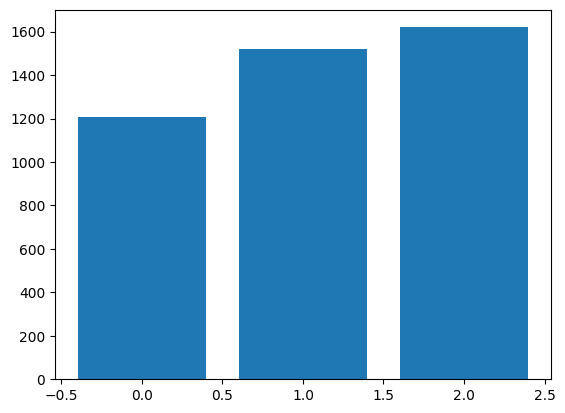

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(Y)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X, Y = over_sample.fit_resample(X, Y)                       # jika error berarti rasio antar kelas sudah seimbang


print(f"Modified set observations {X.shape[0]}")
print(f"Modified set target classes {len(set(Y))}")
print('Resample data {}'.format(Counter(Y)))

Modified set observations 2280
Modified set target classes 3
Resample data Counter({0: 760, 1: 760, 2: 760})


In [ ]:
X_smoteenn= np.array(X)       # jadikan X.todense() jika error
X_smoteenn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y_smoteenn = np.array(Y)
Y_smoteenn

array([0, 0, 0, ..., 2, 2, 2])

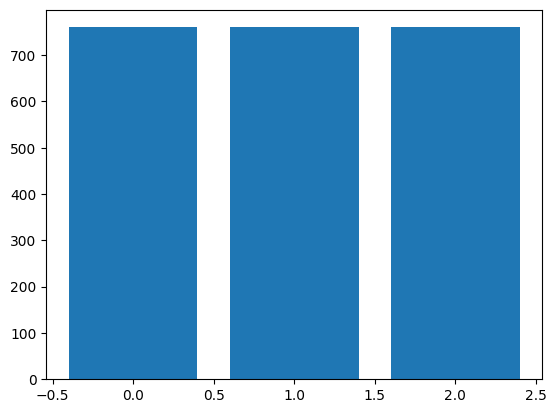

In [ ]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(Y_smoteenn)
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## **Split Data**

In [ ]:
#Import Library
import random
from sklearn.model_selection import train_test_split

In [ ]:

#Memisihkan data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn,Y_smoteenn,test_size=0.2, random_state=57)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1824
Banyak data x_test  : 456
Banyak data y_train : 1824
Banyak data y_test  : 456


## **KNN**

In [ ]:
#Algoritme

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

def training_knn(X_train, X_test, y_train, y_test, preproc):

    clf = KNeighborsClassifier(n_neighbors=6, metric='cosine')
    clf.fit(X_train, y_train)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)

    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    f1 = f1_score(y_pred, y_test, average = 'weighted')
    pres = precision_score(y_pred, y_test, average = 'weighted')
    rec = recall_score(y_pred, y_test, average = 'weighted')
    acc = accuracy_score(y_pred, y_test)




    res = res.append({'Preprocessing': preproc, 'Model': 'K-NN', 'Precision': pres,
                     'Recall': rec, 'F1-score': f1, 'Accuracy': acc}, ignore_index = True)

    return res

In [ ]:
clf = KNeighborsClassifier(n_neighbors=6, metric='cosine')
model = clf.fit(X_train, y_train)

In [ ]:
# menyimpan model
from joblib import dump
dump(model, filename="model_knn_k8.joblib")

['model_knn_k8.joblib']

In [ ]:
y_test = pd.DataFrame(y_test, columns=['y_test'])
y_test.to_excel('y_test_k8.xlsx', index=False)
y_test

,y_test
0,0
1,0
2,1
3,0
4,2
...,...
451,2
452,2
453,2
454,0


In [ ]:
y_predict= clf.predict(X_test)
y_predict = pd.DataFrame(y_predict, columns=['y_predict'])
y_predict.to_excel('y_predict_k8.xlsx', index=False)
y_predict

,y_predict
0,0
1,0
2,1
3,0
4,2
...,...
451,2
452,2
453,2
454,0


## **Model Evaluation**

[[124  25   0]
 [ 16 118  21]
 [  0   0 152]]


<ipython-input-75-e6414017d4fb>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Preprocessing': preproc, 'Model': 'K-NN', 'Precision': pres,
<ipython-input-90-a85482bcfb27>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(training_knn(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)


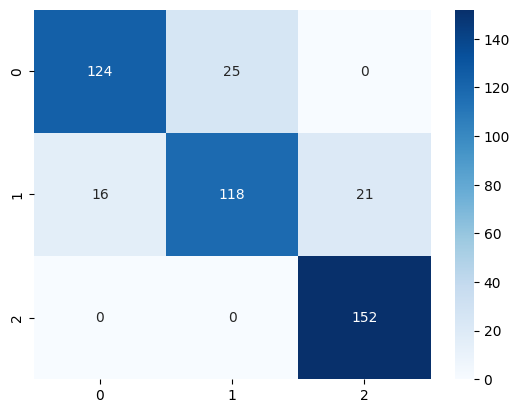

In [ ]:
result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])
result = result.append(training_knn(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)

In [ ]:
result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-grams,K-NN,0.873628,0.864035,0.866685,0.864035


## **Klasifikasi**

In [ ]:
#import joblib
#load_model = joblib.load('/content/model_knn_terbaik.joblib')

In [ ]:
data_X = selected_x
data_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
predict_sentimen = clf.predict(data_X)
predict_sentimen = pd.DataFrame(predict_sentimen, columns=['klasifikasi_sentimen'])
predict_sentimen.to_excel('klasifikasi_sentimen_k1.xlsx', index=False)
predict_sentimen

,klasifikasi_sentimen
0,2
1,0
2,1
3,2
4,0
...,...
4339,2
4340,2
4341,2
4342,2


In [ ]:
predict_sentimen.value_counts()

klasifikasi_sentimen
1                       1969
0                       1706
2                        669
dtype: int64